In [39]:
import numpy as np
import pandas as pd
import re

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from nltk.corpus import wordnet

In [40]:
# グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
font = {'family' : 'meiryo'}
matplotlib.rc('font', **font)

In [41]:
data_vad = pd.read_table('./Emobank-master/corpus/reader.tsv')

In [42]:
# 加工前データ,加工後データ の valence,arousal の分布を表示する

In [43]:
data_arousal = pd.read_csv('data_preprocessed_Arousal.csv',encoding='utf-16')
data_valence = pd.read_csv('data_preprocessed_Valence.csv',encoding='utf-16')

In [44]:
% matplotlib inline

In [45]:
data_vad.head()

,id,Arousal,Dominance,Valence,sd.Arousal,sd.Dominance,sd.Valence,freq
0,110CYL068_1036_1079,3.200000,3.000000,3.0,0.400000,0.000000,0.000000,5
1,110CYL068_1079_1110,3.000000,2.600000,2.6,0.632456,0.489898,0.489898,5
2,110CYL068_1110_1127,2.333333,2.333333,2.0,0.471405,0.471405,1.414214,3
3,110CYL068_1127_1130,3.000000,3.000000,3.0,0.000000,0.000000,0.000000,2
4,110CYL068_1137_1188,3.000000,3.400000,3.6,0.632456,0.489898,0.800000,5


In [51]:
a = 1
b = 5
data_vad = data_vad.assign(
    Valence_reg = data_vad.apply(lambda x: 2*(x['Valence']-a)/(b-a)-1, axis=1),
    Arousal_reg = data_vad.apply(lambda x: 2*(x['Arousal']-a)/(b-a)-1, axis=1),
    Dominance_reg = data_vad.apply(lambda x: 2*(x['Dominance']-a)/(b-a)-1, axis=1)
)


In [47]:
%%bash
pip install seaborn

mkl-random 1.0.1 requires cython, which is not installed.
mkl-fft 1.0.0 requires cython, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [15]:
import seaborn as sns

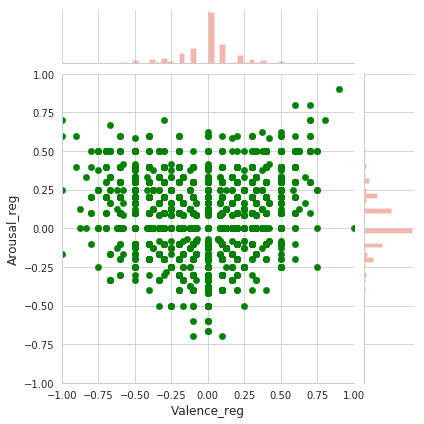

In [54]:
g = sns.JointGrid(x='Valence_reg',y='Arousal_reg',data=data_vad,xlim=(-1,1),ylim=(-1,1)) 
g = g.plot_joint(plt.scatter,color='green',s=40)
g = g.plot_marginals(sns.distplot,kde=False)

In [55]:
g.savefig('./plot_images/raw_plot.png')

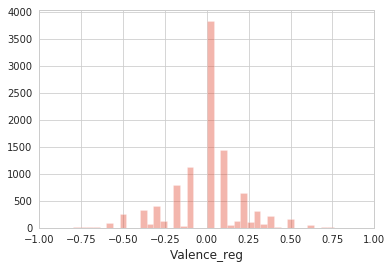

In [62]:
sns.set_style("whitegrid")
g_1 = sns.distplot(data_vad.Valence_reg,kde=False)
plt.xlim(-1,1)
plt.savefig('./plot_images/raw_dist_v.png')

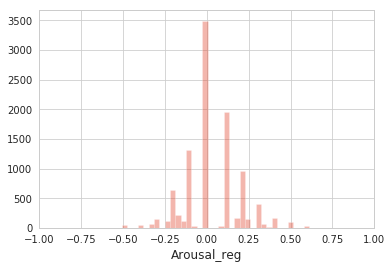

In [63]:
sns.set_style("whitegrid")
g_1 = sns.distplot(data_vad.Arousal_reg,kde=False)
plt.xlim(-1,1)
plt.savefig('./plot_images/raw_dist_a.png')

In [64]:
data_valence.head()

,Unnamed: 0,id,sentence,Arousal,Dominance,Valence,sd.Arousal,sd.Dominance,sd.Valence,freq,reg,words,data_type,Valence_reg,Arousal_reg,Dominance_reg
0,2568,cable_spool_fort_5107_5146,Several more boys spewed out after him.,3.2,2.6,2.6,0.748331,0.489898,0.489898,5,several more boys spewed out after him,7,train,-0.2,0.1,-0.2
1,2548,cable_spool_fort_3784_3808,Chad just hung his head.,3.2,2.6,2.4,0.400000,0.800000,0.800000,5,chad just hung his head,5,train,-0.3,0.1,-0.2
2,3883,hotel-california_28834_28854,"“I don't know much,”",2.6,2.6,2.6,0.489898,0.489898,0.489898,5,i don t know much,5,train,-0.2,-0.2,-0.2
3,370,detroit_10463_10549,They lack the means to build her back to her f...,3.4,3.0,2.6,0.489898,0.000000,0.489898,5,they lack the means to build her back to her f...,18,train,-0.2,0.2,0.0
4,9790,SemEval_1143,Steelers' Roethlisberger has concussion,2.4,2.4,1.8,0.800000,0.800000,0.748331,5,steelers roethlisberger has concussion,4,train,-0.6,-0.3,-0.3


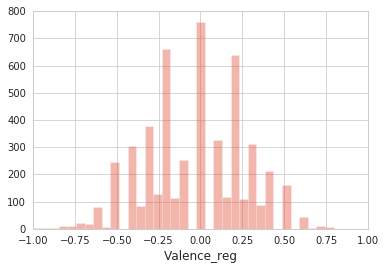

In [66]:
sns.set_style("whitegrid")
g_1 = sns.distplot(data_valence.Valence_reg,kde=False)
plt.xlim(-1,1)
plt.savefig('./plot_images/processed_dist_v.png')

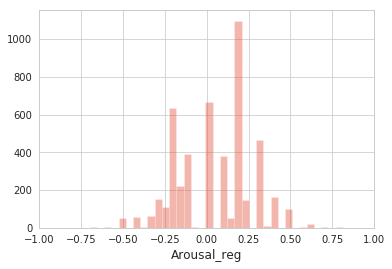

In [67]:
sns.set_style("whitegrid")
g_1 = sns.distplot(data_arousal.Arousal_reg,kde=False)
plt.xlim(-1,1)
plt.savefig('./plot_images/processed_dist_a.png')